In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools

In [15]:
reglab1_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/reglab1.txt', sep='\t')
z = (reglab1_rawdata['z'].to_numpy())[:, np.newaxis]
z = reglab1_rawdata.columns.values.copy()
reglab1_rawdata

,z,x,y
0,2.836772,0.271010,0.308331
1,4.987167,0.589598,0.514913
2,6.412325,0.651744,0.730453
3,4.641998,0.581983,0.461400
4,2.793941,0.463688,0.191102
...,...,...,...
195,2.917468,0.745790,0.073874
196,4.813905,0.474947,0.582424
197,6.419296,0.773870,0.636785
198,4.231917,0.049090,0.994537


z
Coefficients: 
 [4.10248117 4.94308257]
Mean squared error: 0.11
Coefficient of determination: 0.97
x
Coefficients: 
 [ 0.22392669 -1.10594935]
Mean squared error: 0.01
Coefficient of determination: 0.92
y
Coefficients: 
 [ 0.19229293 -0.78820905]
Mean squared error: 0.00
Coefficient of determination: 0.95
Coefficients: 
 [[4.16932067]]
Mean squared error: 2.27
Coefficient of determination: 0.37


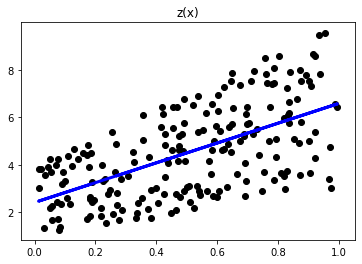

Coefficients: 
 [[4.99042782]]
Mean squared error: 1.38
Coefficient of determination: 0.61


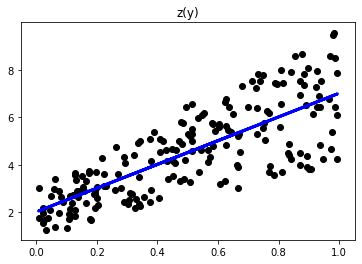

Coefficients: 
 [[0.08777978]]
Mean squared error: 0.05
Coefficient of determination: 0.37


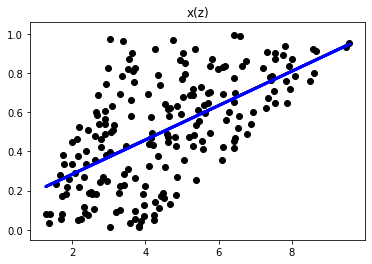

Coefficients: 
 [[0.01154064]]
Mean squared error: 0.08
Coefficient of determination: 0.00


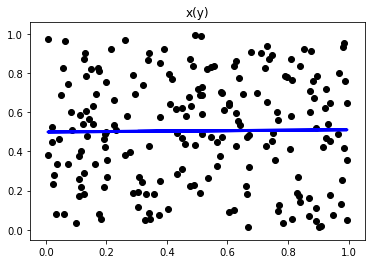

Coefficients: 
 [[0.12310411]]
Mean squared error: 0.03
Coefficient of determination: 0.61


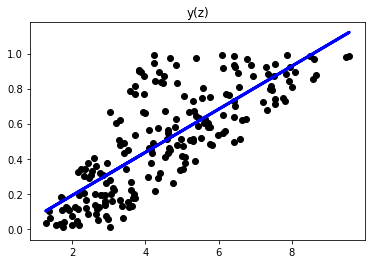

Coefficients: 
 [[0.01352183]]
Mean squared error: 0.09
Coefficient of determination: 0.00


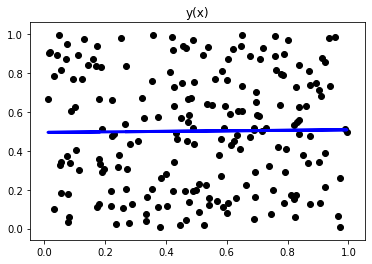

In [16]:
for i in range(3):
    X = reglab1_rawdata.columns.values.copy()
    X = np.delete(X, i)
    y = reglab1_rawdata.columns.values[i]
    print(y)
    regr = linear_model.LinearRegression()
    x_fit = reglab1_rawdata[X].to_numpy() 
    y_fit = reglab1_rawdata[y].to_numpy()
    regr.fit(x_fit, y_fit)
    predictions = regr.predict(x_fit)
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_fit, predictions))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_fit, predictions))

for i in reglab1_rawdata:
    for j in reglab1_rawdata:
        if i!=j:
            X = j
            y = i
            regr = linear_model.LinearRegression()
            x_fit = reglab1_rawdata[X].to_numpy()
            y_fit = reglab1_rawdata[y].to_numpy()
            x_fit = x_fit.reshape(-1, 1)
            y_fit = y_fit.reshape(-1, 1)
            regr.fit(x_fit, y_fit)
            predictions = regr.predict(x_fit)
            print('Coefficients: \n', regr.coef_)
            # The mean squared error
            print('Mean squared error: %.2f'
                  % mean_squared_error(y_fit, predictions))
            # The coefficient of determination: 1 is perfect prediction
            print('Coefficient of determination: %.2f'
                  % r2_score(y_fit, predictions))
            # Plot outputs
            plt.figure()
            plt.title(y + '(' + X + ')')
            plt.scatter(x_fit, y_fit,  color='black')
            plt.plot(x_fit, predictions, color='blue', linewidth=3)
            plt.show()

# 2

In [17]:
reglab_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/reglab.txt', sep='\t')
reglab_y_data = reglab_rawdata['y']
reglab_x_data = reglab_rawdata.iloc[:, 1:]
reglab_x_data

,x1,x2,x3,x4
0,0.233628,0.835549,0.102965,0.457428
1,0.117920,0.090544,0.258778,0.283951
2,0.091520,0.797592,0.198528,0.699287
3,0.876722,0.062935,0.615415,0.176058
4,0.207406,0.303490,0.775967,0.667351
...,...,...,...,...
195,0.163545,0.033599,0.383312,0.645846
196,0.983839,0.225527,0.127676,0.757216
197,0.661587,0.231570,0.800238,0.609558
198,0.828217,0.076275,0.129719,0.965084


In [18]:
axises = reglab_x_data.columns
axises
print(len(reglab_x_data.columns))
a = itertools.combinations(axises, 2)
for subset in a:
        print(subset)
reglab_x_data

4
('x1', 'x2')
('x1', 'x3')
('x1', 'x4')
('x2', 'x3')
('x2', 'x4')
('x3', 'x4')


,x1,x2,x3,x4
0,0.233628,0.835549,0.102965,0.457428
1,0.117920,0.090544,0.258778,0.283951
2,0.091520,0.797592,0.198528,0.699287
3,0.876722,0.062935,0.615415,0.176058
4,0.207406,0.303490,0.775967,0.667351
...,...,...,...,...
195,0.163545,0.033599,0.383312,0.645846
196,0.983839,0.225527,0.127676,0.757216
197,0.661587,0.231570,0.800238,0.609558
198,0.828217,0.076275,0.129719,0.965084


In [19]:
i = 0
axises = reglab_x_data.columns
for k in range(1, len(axises)):
    subsets = itertools.combinations(axises, k)
    min_RSS = np.inf
    min_subset = tuple()
    for subset in subsets:
        print(subset)
        regr = linear_model.LinearRegression()
        regr.fit(reglab_x_data[list(subset)].to_numpy(), reglab_y_data)
        predictions = regr.predict(reglab_x_data[list(subset)].to_numpy())
        RSS = ((predictions - reglab_y_data) ** 2).sum()
        print("Residual sum of squares: %.2f"
              % (RSS))
        if RSS < min_RSS:
            min_RSS = RSS
            min_subset = subset
        i+=1
    print('\nBest subset: {} \nRSS = {}\n'.format(min_subset, min_RSS))
print(i)

('x1',)
Residual sum of squares: 157.22
('x2',)
Residual sum of squares: 268.25
('x3',)
Residual sum of squares: 393.49
('x4',)
Residual sum of squares: 394.59

Best subset: ('x1',) 
RSS = 157.2197758284528

('x1', 'x2')
Residual sum of squares: 0.54
('x1', 'x3')
Residual sum of squares: 156.35
('x1', 'x4')
Residual sum of squares: 157.22
('x2', 'x3')
Residual sum of squares: 267.80
('x2', 'x4')
Residual sum of squares: 267.81
('x3', 'x4')
Residual sum of squares: 393.46

Best subset: ('x1', 'x2') 
RSS = 0.5379617105782544

('x1', 'x2', 'x3')
Residual sum of squares: 0.33
('x1', 'x2', 'x4')
Residual sum of squares: 0.36
('x1', 'x3', 'x4')
Residual sum of squares: 156.35
('x2', 'x3', 'x4')
Residual sum of squares: 267.44

Best subset: ('x1', 'x2', 'x3') 
RSS = 0.33226621497375736

14


# 3

In [20]:
cygage_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/cygage.txt', sep='\t')
cygage_rawdata

,calAge,Depth,Weight
0,0,0,1.0
1,3707,77,0.1
2,4150,90,0.1
3,5350,107,0.1
4,4500,168,0.1
5,7260,217,0.1
6,7630,282,1.0
7,8960,379,0.5
8,10030,440,0.5
9,11940,514,0.5


Coefficients: 
 [[21.9091861]]
Mean squared error: 1240972.98
Coefficient of determination: 0.94


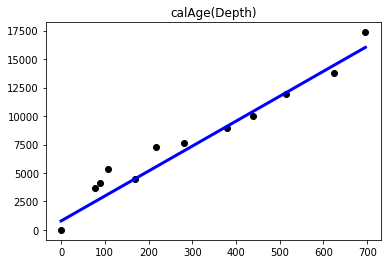

In [21]:
x_fit = cygage_rawdata['Depth'].to_numpy()
y_fit = cygage_rawdata['calAge'].to_numpy()
weights = cygage_rawdata['Weight'].to_numpy()
x_fit = x_fit.reshape(-1, 1)
y_fit = y_fit.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_fit, y_fit, sample_weight=weights)
predictions = regr.predict(x_fit)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_fit, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_fit, predictions))
# Plot outputs
plt.figure()
plt.title('calAge(Depth)')
plt.scatter(x_fit, y_fit,  color='black')
plt.plot(x_fit, predictions, color='blue', linewidth=3)
plt.show()

# 4

In [22]:
longley_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/longley.csv')
longley_Xdata = longley_rawdata[['GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', 'Year']]
longley_X2data = longley_rawdata[['GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces']]
longley_ydata = longley_rawdata['Employed']
longley_Xdata

,GNP.deflator,GNP,Unemployed,Armed.Forces,Year
0,83.0,234.289,235.6,159.0,1947
1,88.5,259.426,232.5,145.6,1948
2,88.2,258.054,368.2,161.6,1949
3,89.5,284.599,335.1,165.0,1950
4,96.2,328.975,209.9,309.9,1951
5,98.1,346.999,193.2,359.4,1952
6,99.0,365.385,187.0,354.7,1953
7,100.0,363.112,357.8,335.0,1954
8,101.2,397.469,290.4,304.8,1955
9,104.6,419.180,282.2,285.7,1956


In [23]:
X_train, X_test, y_train, y_test = train_test_split(longley_Xdata, longley_ydata, test_size=0.5, random_state=42)

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
print('Score: \n', regr.score(X_test, y_test))
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))

Score: 
 0.980894628451099
Mean squared error: 0.21
Coefficient of determination: 0.98


[0.001, 0.001584893192461114, 0.0025118864315095794, 0.003981071705534973, 0.00630957344480193, 0.01, 0.01584893192461114, 0.025118864315095808, 0.039810717055349734, 0.06309573444801933, 0.1, 0.15848931924611143, 0.25118864315095824, 0.3981071705534973, 0.6309573444801936, 1.0, 1.584893192461114, 2.5118864315095824, 3.981071705534973, 6.309573444801936, 10.0, 15.848931924611142, 25.11886431509582, 39.81071705534978, 63.09573444801943, 100.0]
Test score: 
 0.9808397153440445
Train score: 
 0.9995199984144529
Mean squared error: 0.21
Coefficient of determination: 0.98
Test score: 
 0.9808077298935143
Train score: 
 0.9995199225603347
Mean squared error: 0.21
Coefficient of determination: 0.98
Test score: 
 0.9807572363297749
Train score: 
 0.99951973367949
Mean squared error: 0.21
Coefficient of determination: 0.98
Test score: 
 0.9806777090167355
Train score: 
 0.9995192657253862
Mean squared error: 0.21
Coefficient of determination: 0.98
Test score: 
 0.980552910940871
Train score: 
 

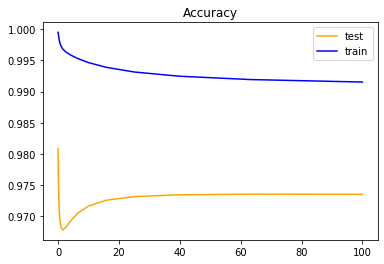

In [25]:
alphas = [10 ** (-3 + 0.2*i) for i in range(26)]
ytest = []
ytrain = []
print(alphas)
for i in alphas:
    regr = linear_model.Ridge(alpha=i)
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_test)
    ytest.append(regr.score(X_test, y_test))
    ytrain.append(regr.score(X_train, y_train))
    print('Test score: \n', regr.score(X_test, y_test))
    print('Train score: \n', regr.score(X_train, y_train))
    print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))
    # The mean squared error
    # Plot outputs
plt.title('Accuracy')
plt.plot(alphas, ytest, color='orange', label='test')
plt.plot(alphas, ytrain, color='blue', label='train')
plt.legend()
plt.show()

# 5

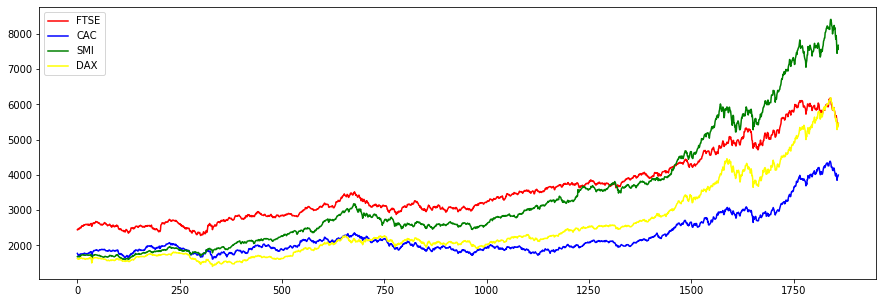

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...
1855,5460.43,7721.3,3939.5,5587.6
1856,5285.78,7447.9,3846.0,5432.8
1857,5386.94,7607.5,3945.7,5462.2
1858,5355.03,7552.6,3951.7,5399.5


In [26]:
eustock_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/eustock.csv')
x = eustock_rawdata.index.values
plt.figure(figsize=[15, 5])
plt.plot(x, eustock_rawdata['FTSE'], c='red', label='FTSE')
plt.plot(x, eustock_rawdata['CAC'], c='blue', label='CAC')
plt.plot(x, eustock_rawdata['SMI'], c='green', label='SMI')
plt.plot(x, eustock_rawdata['DAX'], c='yellow', label='DAX')
plt.legend()
plt.show()
eustock_rawdata

Coefficients: 
 [[1.72943226]]


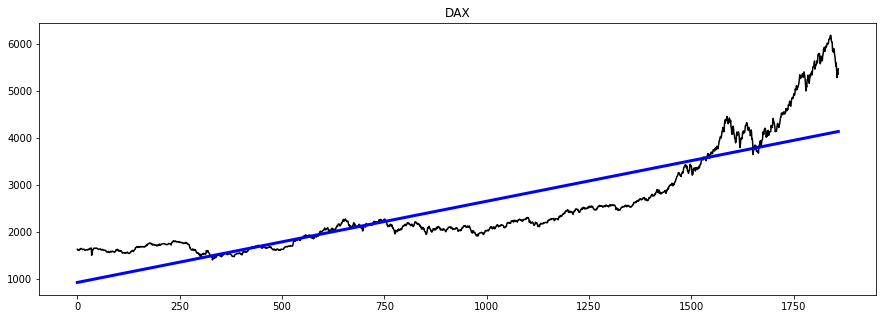

Coefficients: 
 [[2.75975579]]


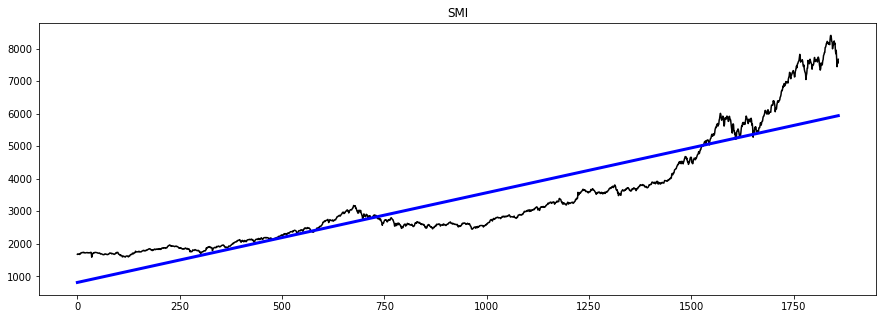

Coefficients: 
 [[0.78682966]]


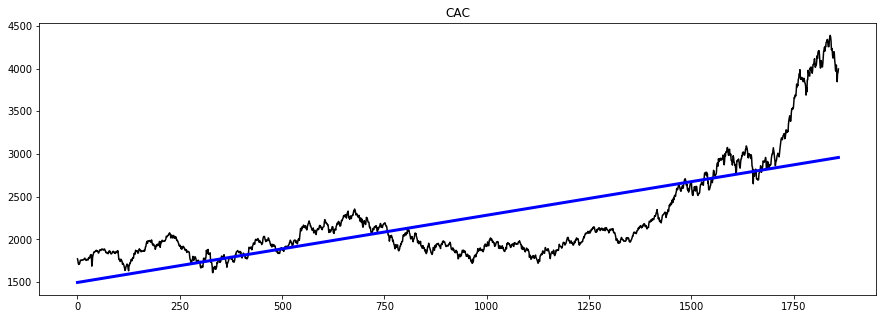

Coefficients: 
 [[1.67483145]]


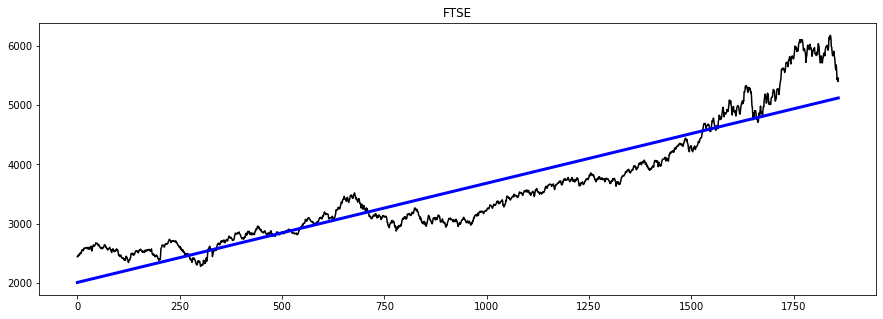

Coefficients: 
 [1.73771229]


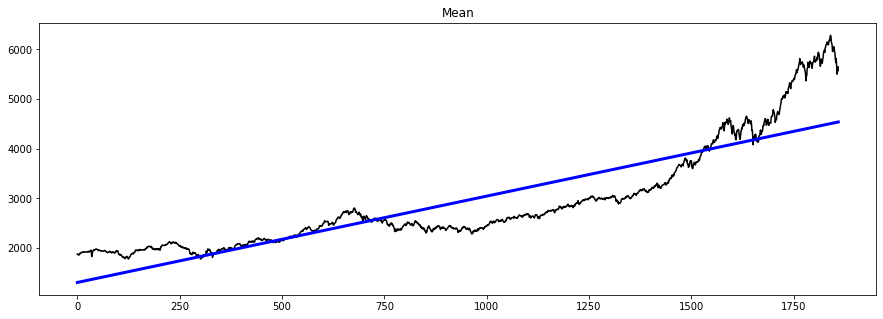

In [27]:
x_fit = x.reshape(-1, 1)
for col in eustock_rawdata.columns:
    
    y = eustock_rawdata[col].to_numpy()
    y = y.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(x_fit, y)
    predictions = regr.predict(x_fit)
    print('Coefficients: \n', regr.coef_)
    plt.figure(figsize=[15, 5])
    plt.title(col)
    plt.plot(x, y,  color='black')
    plt.plot(x, predictions, color='blue', linewidth=3)
    plt.show()
y = eustock_rawdata
mean_data = [np.mean(x) for x in eustock_rawdata.to_numpy()]

regr = linear_model.LinearRegression()
regr.fit(x_fit, mean_data)
predictions = regr.predict(x_fit)
plt.figure(figsize=[15, 5])
print('Coefficients: \n', regr.coef_)
plt.title('Mean')
plt.plot(x, mean_data, c='black')
plt.plot(x, predictions, color='blue', linewidth=3)
plt.show()

# 6

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980]


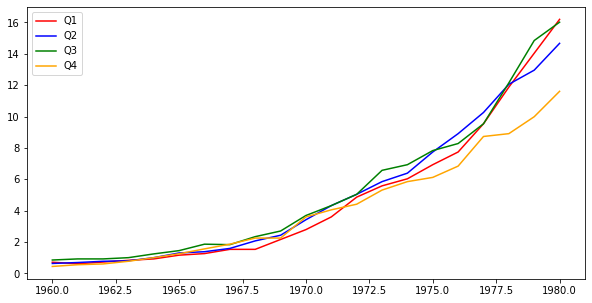

,index,value
0,1960 Q1,0.71
1,1960 Q2,0.63
2,1960 Q3,0.85
3,1960 Q4,0.44
4,1961 Q1,0.61
...,...,...
79,1979 Q4,9.99
80,1980 Q1,16.20
81,1980 Q2,14.67
82,1980 Q3,16.02


In [28]:
JohnsonJohnson_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/JohnsonJohnson.csv')
JohnsonJohnson_Q1data = np.array([x for x in JohnsonJohnson_rawdata.to_numpy() if 'Q1' in x[0]])
JohnsonJohnson_Q2data = np.array([x for x in JohnsonJohnson_rawdata.to_numpy() if 'Q2' in x[0]])
JohnsonJohnson_Q3data = np.array([x for x in JohnsonJohnson_rawdata.to_numpy() if 'Q3' in x[0]])
JohnsonJohnson_Q4data = np.array([x for x in JohnsonJohnson_rawdata.to_numpy() if 'Q4' in x[0]])
x = np.array([x[0][0:4] for x in JohnsonJohnson_Q1data], dtype=np.int64)
print(x)
plt.figure(figsize=[10, 5])
plt.plot(x, JohnsonJohnson_Q1data[:, 1], c='red', label='Q1')
plt.plot(x, JohnsonJohnson_Q2data[:, 1], c='blue', label='Q2')
plt.plot(x, JohnsonJohnson_Q3data[:, 1], c='green', label='Q3')
plt.plot(x, JohnsonJohnson_Q4data[:, 1], c='orange', label='Q4')
plt.legend()
plt.show()
JohnsonJohnson_rawdata

Coefficients: 
 [[0.69496104]]
In 2016: 
 [[36.75963636]]


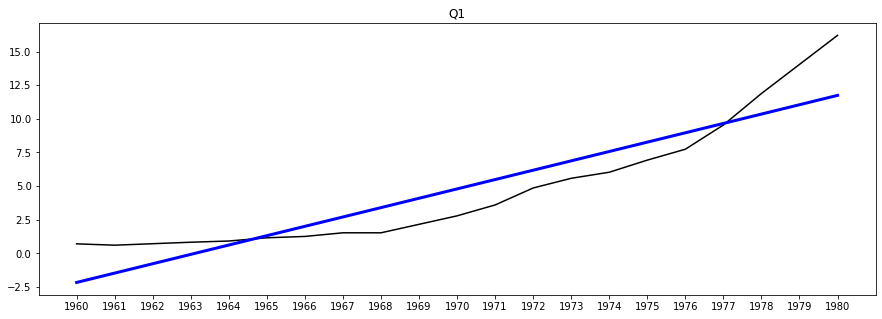

Coefficients: 
 [[0.6852987]]
In 2016: 
 [[36.48945455]]


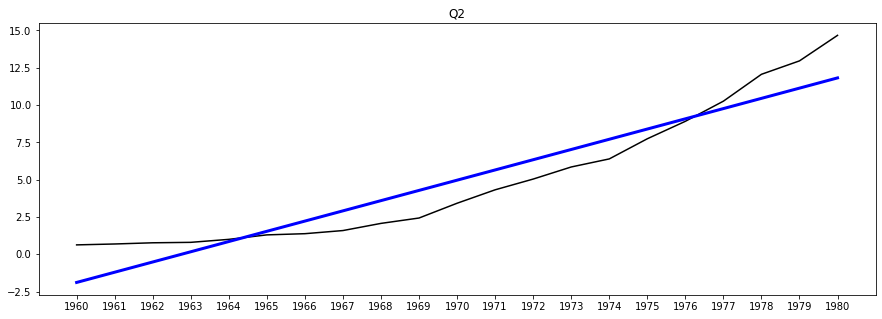

Coefficients: 
 [[0.70435065]]
In 2016: 
 [[37.65393939]]


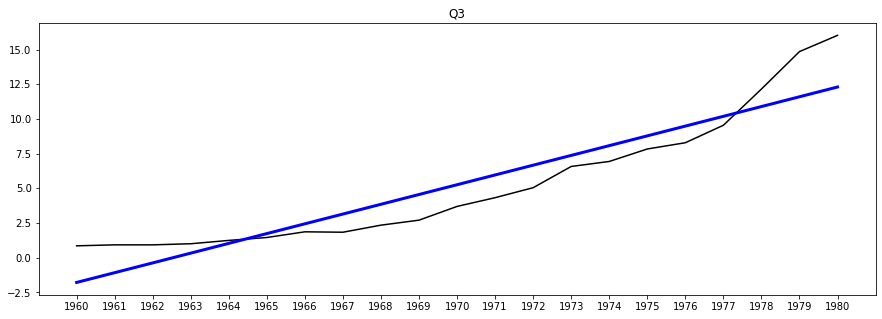

Coefficients: 
 [[0.53490909]]
In 2016: 
 [[28.79391342]]


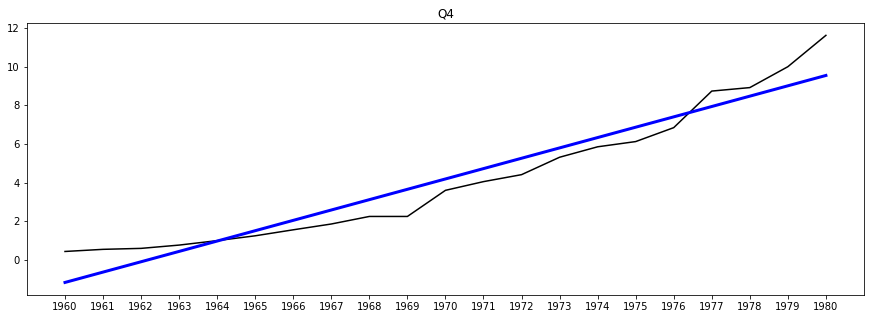

[0.6575, 0.6924999999999999, 0.7525000000000001, 0.85, 1.04, 1.29, 1.5150000000000001, 1.7025000000000001, 2.0475, 2.385, 3.375, 4.0725, 4.8375, 5.8275, 6.300000000000001, 7.155, 7.9425, 9.517499999999998, 11.25, 12.96, 14.625]
Coefficients: 
 [0.65487987]
In 2016: 
 [34.92423593]


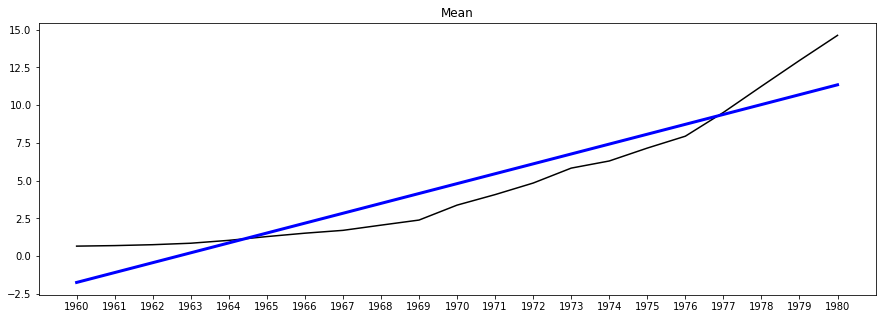

In [29]:
x_fit = x.reshape(-1, 1)
y1 = JohnsonJohnson_Q1data[:, 1]
y1 = y1.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_fit, y1)
predictions1 = regr.predict(x_fit)
print('Coefficients: \n', regr.coef_)
print('In 2016: \n', regr.predict([[2016]]))
plt.figure(figsize=[15, 5])
plt.title('Q1')
plt.plot(x, y1,  color='black')
plt.plot(x, predictions1, color='blue', linewidth=3)
plt.xticks(np.arange(x[0], x[-1] + 1, step=1))
plt.show()

y2 = JohnsonJohnson_Q2data[:, 1]
y2 = y2.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_fit, y2)
predictions2 = regr.predict(x_fit)
print('Coefficients: \n', regr.coef_)
print('In 2016: \n', regr.predict([[2016]]))
plt.figure(figsize=[15, 5])
plt.title('Q2')
plt.plot(x, y2,  color='black')
plt.plot(x, predictions2, color='blue', linewidth=3)
plt.xticks(np.arange(x[0], x[-1] + 1, step=1))
plt.show()

y3 = JohnsonJohnson_Q3data[:, 1]
y3 = y3.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_fit, y3)
predictions3 = regr.predict(x_fit)
print('Coefficients: \n', regr.coef_)
print('In 2016: \n', regr.predict([[2016]]))
plt.figure(figsize=[15, 5])
plt.title('Q3')
plt.plot(x, y3,  color='black')
plt.plot(x, predictions3, color='blue', linewidth=3)
plt.xticks(np.arange(x[0], x[-1] + 1, step=1))
plt.show()

y4 = JohnsonJohnson_Q4data[:, 1]
y4 = y4.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_fit, y4)
predictions4 = regr.predict(x_fit)
print('Coefficients: \n', regr.coef_)
print('In 2016: \n', regr.predict([[2016]]))
plt.figure(figsize=[15, 5])
plt.title('Q4')
plt.plot(x, y4,  color='black')
plt.plot(x, predictions4, color='blue', linewidth=3)
plt.xticks(np.arange(x[0], x[-1] + 1, step=1))
plt.show()

y = []
for i in range(JohnsonJohnson_Q4data.shape[0]):
    y.append((JohnsonJohnson_Q1data[i, 1] + JohnsonJohnson_Q2data[i, 1] + JohnsonJohnson_Q3data[i, 1] + JohnsonJohnson_Q4data[i, 1])/4)
print(y)

regr = linear_model.LinearRegression()
regr.fit(x_fit, y)
predictions = regr.predict(x_fit)
print('Coefficients: \n', regr.coef_)
print('In 2016: \n', regr.predict([[2016]]))
plt.figure(figsize=[15, 5])
plt.title('Mean')
plt.plot(x, y, c='black', label='mean')
plt.plot(x, predictions, color='blue', linewidth=3)
plt.xticks(np.arange(x[0], x[-1] + 1, step=1))
plt.show()

# 7

In [30]:
cars_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/cars.csv')
cars_rawdata
cars_y_data = cars_rawdata['dist']
cars_x_data = cars_rawdata['speed']
cars_rawdata

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [31]:
x_fit = cars_x_data.to_numpy()
x_fit = x_fit.reshape(-1, 1)
y = cars_y_data.to_numpy()
y = y.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x_fit, y)
predictions = regr.predict([[40]])
predictions

array([[139.71725547]])

# 8

In [32]:
svmdata6_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/svmdata6.txt', sep='\t')
x = svmdata6_rawdata['X'].to_numpy()
x = x.reshape(-1, 1)
y = svmdata6_rawdata['Y'].to_numpy()
svmdata6_rawdata

,X,Y
1,0.00,-0.035662
2,0.05,0.059784
3,0.10,-0.111344
4,0.15,0.099728
5,0.20,0.297808
...,...,...
97,4.80,-1.199663
98,4.85,-0.926104
99,4.90,-0.855847
100,4.95,-0.867529


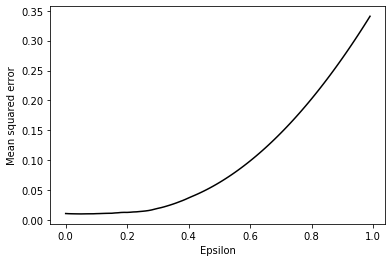

In [33]:
y_axis = []
x_axis = []
for e in range(100): # e в пределах 0 до 1
    eps = e/100
    clf = svm.SVR(C=1.0, epsilon=eps, kernel='rbf')
    clf.fit(x, y)
    predictions = clf.predict(x)
    y_axis.append(mean_squared_error(y, predictions))
    x_axis.append(eps)
plt.plot(x_axis, y_axis, c='black')
plt.xlabel('Epsilon')
plt.ylabel('Mean squared error')
plt.show()

# 9

In [34]:
nsw74psid1_rawdata = pd.read_csv('D:/FAX/mashin_ljorning/Lab_5_Regression/nsw74psid1.csv')
nsw74psid1_rawdata
nsw74psid1_y = nsw74psid1_rawdata['re78']
nsw74psid1_x = nsw74psid1_rawdata.iloc[:, 0:9]
nsw74psid1_rawdata

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
0,0,47,12,0,0,0,0,0.00,0.00,0.000
1,0,50,12,1,0,1,0,0.00,0.00,0.000
2,0,44,12,0,0,0,0,0.00,0.00,0.000
3,0,28,12,1,0,1,0,0.00,0.00,0.000
4,0,54,12,0,0,1,0,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...
2670,1,33,12,1,0,1,0,20279.95,10941.35,15952.600
2671,1,25,14,1,0,1,0,35040.07,11536.57,36646.950
2672,1,35,9,1,0,1,1,13602.43,13830.64,12803.970
2673,1,35,8,1,0,1,1,13732.07,17976.15,3786.628


In [35]:
X_train, X_test, y_train, y_test = train_test_split(nsw74psid1_x, nsw74psid1_y, test_size=0.3, random_state=42)

In [36]:
tree_regressor = tree.DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X_train, y_train)
tree_predictions = tree_regressor.predict(X_test)
print('Tree accuracy: %.2f'
      % tree_regressor.score(X_test, y_test))
print('Tree mean squared error: %.2f'
      % mean_squared_error(y_test, tree_predictions))
# The coefficient of determination: 1 is perfect prediction
print('Tree coefficient of determination: %.2f'
      % r2_score(y_test, tree_predictions))

svr_regressor = svm.SVR(kernel='poly', degree=3)
svr_regressor.fit(X_train, y_train)
svr_predictions = svr_regressor.predict(X_test)
print('SVR accuracy: %.2f'
      % svr_regressor.score(X_test, y_test))
print('SVR mean squared error: %.2f'
      % mean_squared_error(y_test, svr_predictions))
# The coefficient of determination: 1 is perfect prediction
print('SVR coefficient of determination: %.2f'
      % r2_score(y_test, svr_predictions))

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_predictions = linear_regressor.predict(X_test)
print('Linear accuracy: %.2f'
      % linear_regressor.score(X_test, y_test))
print('Linear mean squared error: %.2f'
      % mean_squared_error(y_test, linear_predictions))
# The coefficient of determination: 1 is perfect prediction
print('Linear coefficient of determination: %.2f'
      % r2_score(y_test, linear_predictions))

Tree accuracy: 0.19
Tree mean squared error: 198808457.28
Tree coefficient of determination: 0.19
SVR accuracy: 0.25
SVR mean squared error: 183997770.42
SVR coefficient of determination: 0.25
Linear accuracy: 0.58
Linear mean squared error: 103001507.33
Linear coefficient of determination: 0.58
